In this exercise you will implement a method for inferring the posterior probability density of the variance of thedistribution from which a set of samples were drawn. You will use Bayes' theorem to derive a posterior probabilitydistribution for this variance. You will then proceed, in a rather gratuitous application of the Metropolis-Hastingalgorithm, to sample from this posterior density to form a Markov chain. We then use the Markov chain to estimatethe posterior density. I call this application 'rather gratuitous' because we already know the posterior densityand can plot it and do anything we want with it. The utility of generating a Markov chain will become more evidentin the group project.

1) Assume a Gaussian random number generator with zero mean and variance a is producing samples, x,  with posterior density P(x|a) = N(a) e^{-x^2/(2a)}. Analytically find N(a) so that P(x|a) is appropriately normalized.

3) Use Bayes’s theorem to calculate P(a|{x}) when one has multiple samples drawn;  {x} =  (x_1, x_2, x_3, ... x_n).

4) Draw 100 samples and plot the resulting P(a|{x}).

5) Use the Metropolis Hastings algorithm to sample from this posterior and create a Markov chain.

6) Plot a "trace plot" which is sample number vs. parameter value.

7) Plot a histogram of the chain with variance a as the x axis and compare with P(a|x). Indicate in your graph the true value of the variance.

Develop in the VS Code IDE under version control on your own GitHub repo. Submit a link to the GitHub repo.



NOTE:

1) In (3), simply adopt a uniform prior, which means P(a) is independent of a.

2) In (3), you only need to calculate an un-normalized P(a|x); i.e., don't concern yourself with factors that have
no dependence on a. If you do want to normalize P(a|x) you can do so by making sure that \int da P(a|x)=1 -- but
you don't have to.

In [80]:
import numpy as np
import scipy.integrate as integrate
from typing import Dict, Union

Define width and mean of Gaussian

In [81]:
width = 1
mean = 0

Define the gaussian with normalization, it should equal 1 when integrated over all x

In [82]:
def gaussian(x):
    return 1 / (np.sqrt(2 * np.pi) * width) * np.exp(-(x - mean) ** 2 / (2 * width))

Integrate using scipy

In [83]:
print(integrate.quad(gaussian, -np.inf, np.inf))

(0.9999999999999997, 1.017819145094224e-08)


When you have multiple samples, the probability function becomes

$ P(x_1, ..., x_n|\sigma) = \prod^{\infty}_{i=1} P(x_i|\sigma)=N^n(\sigma) e^{-\sum_i (x_i-\mu)^2/(2 \sigma^2)}$

In [84]:
# Make one hundred samples for x
data = np.random.normal(0, 1, 100)
print(f"Sample of data: {data[:5]}")

# Generate range of possible widths sigmas
sigma_range: np.ndarray = np.around(np.linspace(0.01, 5, 500), decimals=2)

# prior distribution P(sigma)
prior = np.ones(500)/500
print(f"{sigma_range[:5]=}")
print(f"{prior[:5]=}")

# For one Gaussian, the distribution of normalizations for sigmas is...
normalization: np.ndarray = 1/(np.sqrt(2*np.pi)*sigma_range)
print(f"{normalization[:5]=}")

# For one hundred points, do N(sigma)^n
n_normalization: np.ndarray = normalization ** 100
print(f"{n_normalization[:5]=}")

# The exponent has a sum over the squares of all the data
squared_data = [(i - mean)**2 for i in data]
sum_of_squared_data: int = sum(squared_data)
print(f"{sum_of_squared_data=}")

# Distribution of final value of exponential for all values of sigma
exponential: np.ndarray = np.exp(-sum_of_squared_data / (2*sigma_range**2))
print(f"{exponential[:5]=}")

# Multiply times normalization
likelihood: np.ndarray = n_normalization * exponential
print(f"{likelihood[:5]=}")

Sample of data: [-0.70620939 -2.40494467  0.27035186  1.38193353 -1.61271815]
sigma_range[:5]=array([0.01, 0.02, 0.03, 0.04, 0.05])
prior[:5]=array([0.002, 0.002, 0.002, 0.002, 0.002])
normalization[:5]=array([39.89422804, 19.94711402, 13.29807601,  9.97355701,  7.97884561])
n_normalization[:5]=array([1.23312352e+160, 9.72762938e+129, 2.39266067e+112, 7.67374652e+099,
       1.56316977e+090])
sum_of_squared_data=89.96158048056047
exponential[:5]=array([0., 0., 0., 0., 0.])
likelihood[:5]=array([0., 0., 0., 0., 0.])


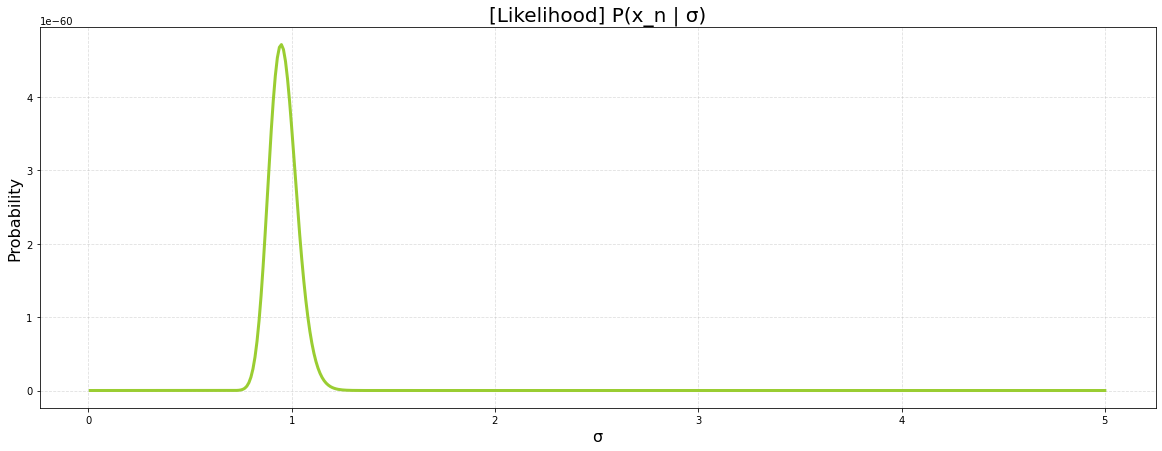

In [85]:
from matplotlib import pyplot as plt

# Create the plot
fig1, ax1 = plt.subplots()
ax1.plot(sigma_range, likelihood, linewidth=3, color='yellowgreen')

# Add a title
ax1.set_title('[Likelihood] P(x_n | σ)' , fontsize=20)

# Add X and y Label
ax1.set_xlabel("σ", fontsize=16)
ax1.set_ylabel("Probability", fontsize=16)

# Add a grid
plt.grid(alpha=.4, linestyle='--')

# Show the plot
plt.show()
# Centered at 0.3

In [86]:
def create_posterior(_likelihood, _prior):
    posterior = _likelihood * _prior # element-wise multiplication
    second_normalization = np.sum(posterior)
    print(f"{second_normalization=}")
    normalized_posterior = posterior / np.sum(posterior)

    max_bin = np.argmax(posterior)
    _max_sigma = round(sigma_range[max_bin], 2)  # result was like 0.960000000001
    print(f"Max bin: {max_bin}\nMax posterior probability: {posterior[max_bin]}\n"
          f"Sigma value at max bin: {_max_sigma}")
    return posterior, _max_sigma
sigma_posterior, max_sigma = create_posterior(likelihood, prior)

second_normalization=1.599797540174164e-61
Max bin: 94
Max posterior probability: 9.426436032663802e-63
Sigma value at max bin: 0.95


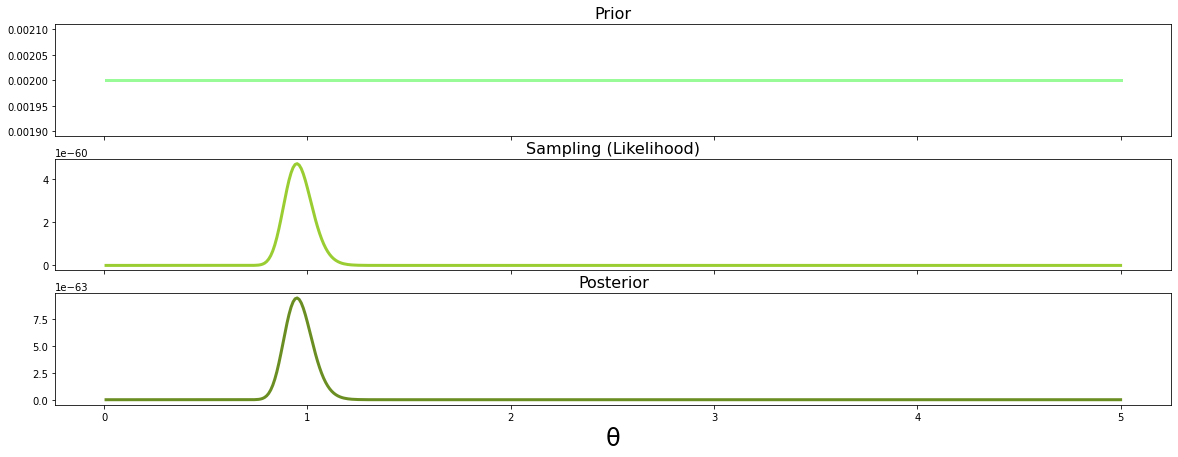

In [87]:
def plot_together(_posterior, _likelihood, _prior):
    # Plotting all three together
    # Below line to avoid IDE bug on sharex type
    # noinspection PyTypeChecker
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(20,7))
    plt.xlabel('θ', fontsize=24)

    axes[0].plot(sigma_range, _prior, label="Prior", linewidth=3, color='palegreen')
    axes[0].set_title("Prior", fontsize=16)

    axes[1].plot(sigma_range, _likelihood, label="Likelihood", linewidth=3, color='yellowgreen')
    axes[1].set_title("Sampling (Likelihood)", fontsize=16)

    axes[2].plot(sigma_range, _posterior, label='Posterior', linewidth=3, color='olivedrab')
    axes[2].set_title("Posterior", fontsize=16)
    plt.show()

plot_together(sigma_posterior, likelihood, prior)

/tmp/ipykernel_106393/1378689658.py:74: RuntimeWarning: invalid value encountered in double_scalars
  acceptance_prob: float = min(1., candidate_pos_prob * move_to_last_pos_prob / last_pos_prob / move_to_candidate_prob)
/tmp/ipykernel_106393/1378689658.py:74: RuntimeWarning: divide by zero encountered in double_scalars
  acceptance_prob: float = min(1., candidate_pos_prob * move_to_last_pos_prob / last_pos_prob / move_to_candidate_prob)


Done


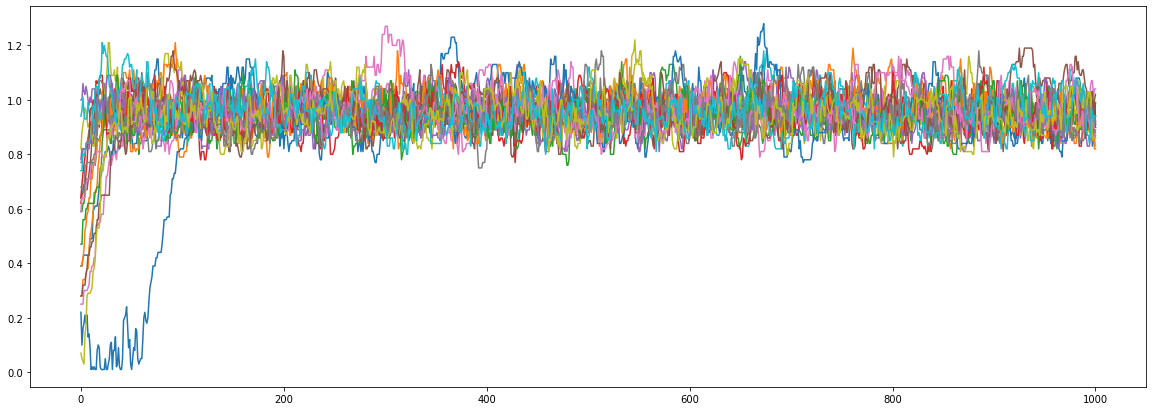

In [91]:
class MarkovChain:
    def __init__(self,
                 generator_width: float,
                 initial_position: float,
                 posterior: Union[np.ndarray, list]):
        self.generator_width = generator_width
        self.chain = [initial_position]
        self.posterior = posterior

        # A dictionary to match a sigma value to a likelihood probability
        self.position_to_likelihood: Dict[float: float] = dict(zip(sigma_range, likelihood))

    @staticmethod
    def evaluate_gaussian(pos: float,
                          loc: float,
                          scale: float) -> float:
        """
        Evaluates the probability density for a Gaussian
        :param pos: Position on the Gaussian
        :param loc: Mean value of Gaussian
        :param scale: Width of gaussian
        :return: Probability density
        """
        return 1/(np.sqrt(2*np.pi)*scale)*np.exp(-(pos-loc)**2/(2*scale**2))

    def generator(self, position_in) -> float:
        """
        Generates a new candidate position for the chain
        :param position_in: Starting position
        :return: Candidate next position
        """
        candidate =  np.random.normal(
            # a gaussian centered around current pos.
            loc=position_in,
            # scale is how far the random points will roam
            scale=self.generator_width)
        return round(candidate, 2)

    def generate_acceptance_prob(self,
                                 last_pos: float,
                                 candidate_pos: float) -> float:
        """
        Generates acceptance probability according to Metropolis-Hastings Algorithm
        :param last_pos: Starting position
        :param candidate_pos: Potential new position
        :return: A probability for accepting the new position
        """
        # Starting position x_t
        # last_pos = self.chain[-1]

        # Posterior probability of that position P(x_t)
        try:
            last_pos_prob = self.position_to_likelihood[last_pos]
        except KeyError:
            print(len(self.chain), last_pos)
            print(self.chain)
            raise

        # New position x'
        # candidate_pos = self.generator(last_pos)

        # Posterior probability of new position P(x')
        if candidate_pos in self.position_to_likelihood:
            candidate_pos_prob = self.position_to_likelihood[candidate_pos]
        else:
            candidate_pos_prob = 0.

        # The probabilities to move back and forth from the new and old positions
        # g(x'|x_t)
        move_to_candidate_prob = self.evaluate_gaussian(candidate_pos, last_pos, self.generator_width)
        # g(x_t|x')
        move_to_last_pos_prob = self.evaluate_gaussian(last_pos, candidate_pos, self.generator_width)

        acceptance_prob: float = min(1., candidate_pos_prob * move_to_last_pos_prob / last_pos_prob / move_to_candidate_prob)
        return acceptance_prob

    def propagate_chain(self, chain) -> Union[np.ndarray, list]:
        """
        Advances the Markov chain by one time step
        :return: The propagated Markov chain
        """
        last_pos = chain[-1]  # starting position x_t
        candidate_pos = self.generator(last_pos)  # new position x'
        if candidate_pos < 0.01:
            candidate_pos = 0.01

        acceptance_prob = self.generate_acceptance_prob(last_pos, candidate_pos)

        random_number = np.random.uniform(0, 1)

        if random_number <= acceptance_prob:
            chain.append(candidate_pos)
        else:
            chain.append(last_pos)

        return chain

    def make_chain(self):
        for _ in range(1000):
            self.chain = self.propagate_chain(self.chain)

        plt.rcParams['figure.figsize'] = [20, 7]
        plt.plot(self.chain)


for i in range(20):
    markov_chain = MarkovChain(generator_width=0.05,
                    initial_position=round(np.random.uniform(0.01, 5), 2),
                    posterior=sigma_posterior)

    markov_chain.make_chain()

print("Done")

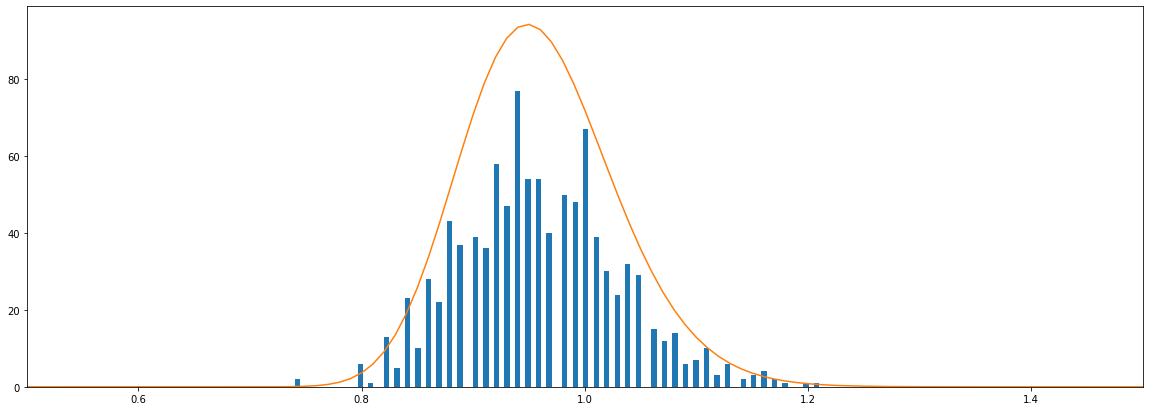

In [101]:
fig, ax = plt.subplots()
ax.hist(markov_chain.chain, bins=100)
ax.plot(sigma_range, sigma_posterior*1e64)
ax.set_xbound(0.5, 1.5)